In [1]:

import pandas as pd
import seaborn as sns



In [78]:

veri = pd.DataFrame({"Gübre(ton)":[50,20,36,58,74,40,66,25,45,80],
                     "Buğday(ton)":[100,50,65,90,120,80,110,55,90,150]})

veri


,Gübre(ton),Buğday(ton)
0,50,100
1,20,50
2,36,65
3,58,90
4,74,120
5,40,80
6,66,110
7,25,55
8,45,90
9,80,150


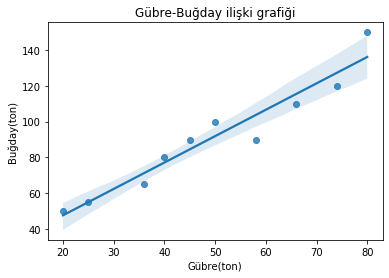

In [79]:

reg = sns.regplot(x='Gübre(ton)',y = "Buğday(ton)",data=veri)
reg.set_title("Gübre-Buğday ilişki grafiği");


In [80]:
n = len(veri) # veri setimizin uzunluğu
n

10

In [81]:

n = len(veri) # veri setimizin uzunluğu
gubre_toplam = veri["Gübre(ton)"].sum() # bağımsız değişkenin toplamını elde ettik.
bugday_toplam = veri["Buğday(ton)"].sum() # bağımlı değişkenin toplamı elde ettik.
bugday_ortalama = bugday_toplam/n
gubre_ortalama = gubre_toplam/n


In [82]:
print(f"gübre_ort:{gubre_ortalama}\nbuğday_ort:{bugday_ortalama}")

gübre_ort:49.4
buğday_ort:91.0


In [83]:


üst_denklem = 0 #üst ve alt denklemde toplama yapacağımız için başta 0 sıfır olarak tanımladık
alt_denklem = 0
for gubre,bugday in zip(veri["Gübre(ton)"],veri["Buğday(ton)"]):
    üst_denklem += (gubre-gubre_ortalama)*(bugday-bugday_ortalama)
    alt_denklem += ((gubre-gubre_ortalama)**2)




In [85]:
print(f"üst_denklem:{üst_denklem}\nalt_denklem:{alt_denklem}")

üst_denklem:5371.0
alt_denklem:3638.4000000000005


In [86]:
b1 = üst_denklem/alt_denklem
b1 # eğim(coef)

1.4761983289357958

In [103]:
b0 = bugday_ortalama-(b1*gubre_ortalama)
b0 # kesim noktası(intercept)

18.075802550571694

In [111]:
gubre_degeri = float(input("Gübre(ton) girin:"))
tahmin_sonucu = round(b0+(b1*gubre_degeri),8)
print(f"{gubre_degeri} ton gübre kullanırsanız tahmini: {tahmin_sonucu} ton buğday elde edersiniz")

Gübre(ton) girin:90
90.0 ton gübre kullanırsanız tahmini: 150.93365215 ton buğday elde edersiniz


### RMSE(HATA KARELER TOPLAMIN KAREKÖKÜ) & SSE(HATA KARELER TOPLAMI)
### MSE ( HATA KARELER ORTALAMASI)

In [107]:
SSE = 0 # sse(hata kareler toplamı)
for gubre,gercek_deger in zip(veri["Gübre(ton)"],veri["Buğday(ton)"]):
    tahmin = b0+(b1*gubre)
    SSE += ((tahmin-gercek_deger)**2)
print("SSE degeri:",SSE)

SSE degeri: 611.3387752858396


In [109]:
MSE = SSE/n # mse(hata kareler toplamının ortalaması)
MSE

61.13387752858396

In [110]:
RMSE = pow(MSE,(1/2)) # RMSE(hata kareler ortalamasının karekökü)
RMSE

7.818815609066629

# Model Tuning

In [13]:
from sklearn.linear_model import LinearRegression

In [92]:
x = veri[["Gübre(ton)"]]

In [93]:
y = veri[["Buğday(ton)"]]

In [94]:
model = LinearRegression().fit(x,y)

In [95]:
model.coef_

array([[1.47619833]])

In [96]:
model.intercept_

array([18.07580255])

In [101]:
model.predict([[90]])

array([[150.93365215]])

In [97]:
model.predict(veri[["Gübre(ton)"]])

array([[ 91.885719  ],
       [ 47.59976913],
       [ 71.21894239],
       [103.69530563],
       [127.31447889],
       [ 77.12373571],
       [115.50489226],
       [ 54.98076077],
       [ 84.50472735],
       [136.17166887]])

In [98]:
model.score(x,y)

0.9284146633154755

In [99]:
sse = 0 # sse(hata kareler toplamı)
for gubre,gercek_deger in zip(veri["Gübre(ton)"],veri["Buğday(ton)"]):
    tahmin = model.predict([[gubre]])
    sse += ((tahmin-gercek_deger)**2)
MSE = sse/n # mse(hata kareler toplamının ortalaması)
RMSE = pow(MSE,(1/2)) # RMSE(hata kareler ortalamasının karekökü)
RMSE

array([[7.81881561]])